In [1]:
from dgpsi import dgp, kernel, combine, lgp, path, emulator
import numpy as np
import matplotlib.pyplot as plt

Train for a deterministic step function

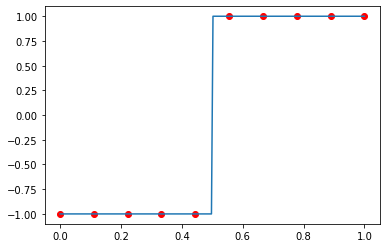

In [2]:
#Draw some data points
n=10
X=np.linspace(0,1.,n)[:,None]
f= lambda x: -1. if x<0.5 else 1.
Y=np.array([f(x) for x in X]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X,Y,color='r')

In [3]:
#Construct a three-layered DGP structure
layer1=[kernel(length=np.array([1.]),name='sexp')]
layer2=[kernel(length=np.array([1.]),name='sexp')]
layer3=[kernel(length=np.array([1.]),name='sexp',scale_est=1)]
all_layer=combine(layer1,layer2,layer3)
m=dgp(X,[Y],all_layer)

In [4]:
#Train with 500 SEM steps
m.train(N=500)

Iteration 500: Layer 3: 100%|██████████| 500/500 [00:20<00:00, 24.53it/s]


In [5]:
#Export trained structure and construct an emulator object
final_layer_obj=m.estimate()
emu=emulator(final_layer_obj)

In [6]:
#Make predictions over (0,1)
z=np.linspace(0,1,300)[:,None].reshape(-1,1)
mu,var=emu.predict(z, N=50, method='mean_var')

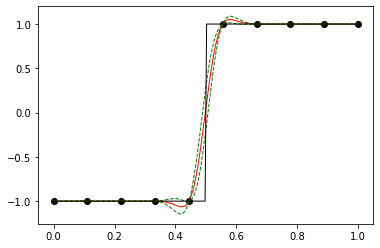

In [7]:
#Draw the predictions
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')

Train for a step function with noisy data

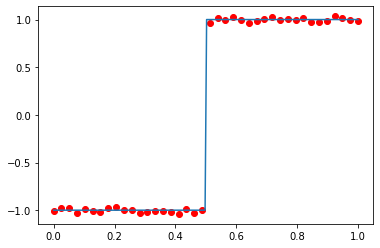

In [8]:
#Draw some noisy data points
n=40
X=np.linspace(0,1.,n)[:,None]
f= lambda x: -1. if x<0.5 else 1.
Y=np.array([f(x) for x in X]).reshape(-1,1) + np.random.randn(*X.shape)*0.02
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X,Y,color='r')

In [9]:
#Construct a three-layered DGP structure and allow nugget estimation with Matern2.5 kernel
layer1=[kernel(length=np.array([0.5]),name='matern2.5',nugget_est=1)]
layer2=[kernel(length=np.array([0.5]),name='matern2.5',nugget_est=1)]
layer3=[kernel(length=np.array([0.5]),name='matern2.5', nugget_est=1, scale_est=1)]
all_layer=combine(layer1,layer2,layer3)
m=dgp(X,[Y],all_layer)

In [10]:
#Train with 1000 SEM steps
m.train(N=1000)

Iteration 1000: Layer 3: 100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


In [11]:
#Export trained structure and construct an emulator object
final_layer_obj=m.estimate()
emu=emulator(final_layer_obj)

In [12]:
#Make predictions over (0,1)
z=np.linspace(0,1,100)[:,None].reshape(-1,1)
mu,var=emu.predict(z, N=50, method='mean_var')

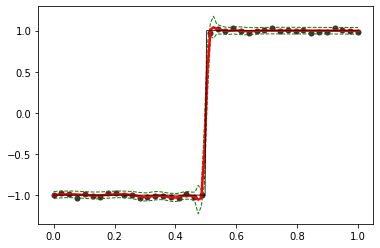

In [13]:
#Draw the predictions
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
p=plt.plot(z,mu,color='r',alpha=1,lw=2.5)
plt.plot(Xt,Yt,color='black',lw=1,alpha=0.8)
plt.scatter(X,Y,color='black',lw=0.02,alpha=0.8)